In [21]:
import pandas as pd
import numpy as np
import json
import re 
import sys
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from keras.models import Sequential
from keras.layers import Dense
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import utils

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
spotify_df = pd.read_csv('/kaggle/input/hahahaahah/data_moods.csv')
spotify_df.shape

(686, 19)

In [4]:
spotify_df.isna().sum()

name                0
album               0
artist              0
id                  0
release_date        0
popularity          0
length              0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
valence             0
loudness            0
speechiness         0
tempo               0
key                 0
time_signature      0
mood                0
dtype: int64

In [5]:
spotify_df.head()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


In [6]:
df = spotify_df[['popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'valence', 'loudness', 'speechiness', 'tempo','key']]

In [7]:
df['label'] = spotify_df['mood']
df

,popularity,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,label
0,68,0.866,0.13700,0.7300,0.000000,0.0843,0.6250,-8.201,0.0767,118.523,5,Happy
1,43,0.381,0.01890,0.8320,0.196000,0.1530,0.1660,-5.069,0.0492,120.255,8,Sad
2,60,0.346,0.91300,0.1390,0.000077,0.0934,0.1160,-15.326,0.0321,136.168,0,Sad
3,2,0.466,0.08900,0.4380,0.000006,0.1130,0.5870,-12.858,0.0608,193.100,4,Happy
4,60,0.419,0.00171,0.9320,0.000000,0.1370,0.4450,-3.604,0.1060,169.881,1,Energetic
...,...,...,...,...,...,...,...,...,...,...,...,...
681,36,0.402,0.96100,0.2360,0.919000,0.0921,0.1460,-20.615,0.0603,129.736,0,Calm
682,5,0.452,0.75700,0.5150,0.120000,0.1400,0.1910,-7.351,0.0255,80.537,11,Sad
683,87,0.642,0.78600,0.3740,0.000000,0.0906,0.0799,-9.386,0.0545,124.099,4,Sad
684,76,0.561,0.91300,0.0848,0.000026,0.1120,0.2060,-15.099,0.0404,102.128,2,Sad


In [8]:
from sklearn.preprocessing import StandardScaler

# Assuming 'label_column' is the name of your label column
label_column = 'label'

# Extract the label column
label_data = df[label_column]

# Drop the label column from the DataFrame before scaling
df_features_only = df.drop(columns=[label_column])

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the feature columns
scaled_features = scaler.fit_transform(df_features_only)

# Create a new DataFrame with the scaled features
df_scaled = pd.DataFrame(scaled_features, columns=df_features_only.columns)

# Add back the label column to the scaled DataFrame
df_scaled[label_column] = label_data

In [9]:
df=df_scaled

In [10]:
df

,popularity,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,label
0,1.149209,2.300744,-0.762003,0.681395,-0.852255,-0.581363,1.120746,0.446193,0.550357,-0.021123,-0.094490,Happy
1,0.063616,-0.752668,-1.049750,0.994037,-0.374460,-0.097642,-0.699816,0.865853,-0.114799,0.038688,0.750992,Sad
2,0.801819,-0.973017,1.128697,-1.130088,-0.852066,-0.517290,-0.898135,-0.508493,-0.528405,0.588217,-1.503628,Sad
3,-1.716755,-0.217534,-0.878954,-0.213619,-0.852241,-0.379285,0.970024,-0.177803,0.165776,2.554267,-0.376318,Happy
4,0.801819,-0.513431,-1.091633,1.300548,-0.852255,-0.210299,0.406800,1.062150,1.259051,1.752438,-1.221801,Energetic
...,...,...,...,...,...,...,...,...,...,...,...,...
681,-0.240349,-0.620458,1.245647,-0.832772,1.388017,-0.526443,-0.779144,-1.217172,0.153682,0.366099,-1.503628,Calm
682,-1.586484,-0.305673,0.748608,0.022395,-0.559728,-0.189176,-0.600657,0.560085,-0.688043,-1.332905,1.596475,Sad
683,1.974259,0.890509,0.819265,-0.409786,-0.852255,-0.537005,-1.041320,0.287414,0.013395,0.171434,-0.376318,Sad
684,1.496598,0.380557,1.128697,-1.296217,-0.852191,-0.386326,-0.541162,-0.478077,-0.327649,-0.587297,-0.939973,Sad


In [11]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'label_column' is the name of your label column
label_column = 'label'

# Extract the label column
label_data = df[label_column]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the label column
encoded_labels = label_encoder.fit_transform(label_data)

# Replace the original label column with the encoded labels in the scaled DataFrame
df[label_column] = encoded_labels

In [12]:
df

,popularity,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,label
0,1.149209,2.300744,-0.762003,0.681395,-0.852255,-0.581363,1.120746,0.446193,0.550357,-0.021123,-0.094490,2
1,0.063616,-0.752668,-1.049750,0.994037,-0.374460,-0.097642,-0.699816,0.865853,-0.114799,0.038688,0.750992,3
2,0.801819,-0.973017,1.128697,-1.130088,-0.852066,-0.517290,-0.898135,-0.508493,-0.528405,0.588217,-1.503628,3
3,-1.716755,-0.217534,-0.878954,-0.213619,-0.852241,-0.379285,0.970024,-0.177803,0.165776,2.554267,-0.376318,2
4,0.801819,-0.513431,-1.091633,1.300548,-0.852255,-0.210299,0.406800,1.062150,1.259051,1.752438,-1.221801,1
...,...,...,...,...,...,...,...,...,...,...,...,...
681,-0.240349,-0.620458,1.245647,-0.832772,1.388017,-0.526443,-0.779144,-1.217172,0.153682,0.366099,-1.503628,0
682,-1.586484,-0.305673,0.748608,0.022395,-0.559728,-0.189176,-0.600657,0.560085,-0.688043,-1.332905,1.596475,3
683,1.974259,0.890509,0.819265,-0.409786,-0.852255,-0.537005,-1.041320,0.287414,0.013395,0.171434,-0.376318,3
684,1.496598,0.380557,1.128697,-1.296217,-0.852191,-0.386326,-0.541162,-0.478077,-0.327649,-0.587297,-0.939973,3


In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(df.drop(['label'], axis = 1),df['label'],test_size=0.2,random_state=15)

In [14]:
X_train

,popularity,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key
573,0.367582,1.268250,-1.093921,1.024688,1.166184,0.796574,-0.664119,0.867193,-0.504218,0.168361,0.469165
685,-0.023231,-0.777851,1.326051,-1.508323,1.295383,-0.477155,-1.039337,-2.264983,-0.344580,0.726730,-1.503628
669,0.714972,1.413051,0.531762,-0.765339,-0.852191,-0.502503,-0.672052,-0.339531,4.862990,0.301867,1.596475
304,0.932090,-1.205958,-1.049019,1.294418,-0.846892,-0.428572,0.133121,0.687645,1.718614,2.648025,1.596475
121,-0.240349,-0.689711,1.265139,-0.848097,1.473337,-0.358161,-1.008400,-0.732795,-0.426818,-0.385173,-0.658145
...,...,...,...,...,...,...,...,...,...,...,...
667,-1.803602,0.550541,0.390447,-0.094079,-0.847672,-0.315915,0.577354,-0.157973,-0.114799,1.079557,1.032820
156,-1.803602,0.657568,0.748608,-0.578367,-0.846477,-0.358161,-0.275415,0.085623,-0.564687,-0.329160,1.314647
384,0.845243,-0.607867,-0.428207,-0.084884,-0.852234,-0.245504,-0.564960,0.351729,-0.571943,0.346276,1.032820
645,0.280735,-0.475657,1.260266,-1.041200,1.141806,-0.048354,-1.209098,-0.339397,-0.525987,-1.003492,-1.503628


In [15]:
X_test

,popularity,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key
234,0.584701,0.216869,-1.093560,1.061469,-0.848623,-0.698949,1.092982,0.671566,-0.414724,-0.421502,-1.221801
38,0.497853,0.216869,1.016619,-1.105567,1.090614,-0.594037,-0.414238,-1.823616,-0.380862,0.265503,-0.939973
583,0.454430,-0.507136,1.062912,-0.722428,1.180810,-0.582771,0.148986,-0.443776,-0.281693,2.102951,-0.376318
238,-0.240349,0.009111,-1.095278,1.263767,-0.852255,0.979641,-0.636354,0.930303,0.173032,1.407209,-0.939973
195,0.237311,0.197982,-1.095039,0.479098,-0.748164,0.958518,-1.060756,0.231405,0.153682,0.339750,-1.221801
...,...,...,...,...,...,...,...,...,...,...,...
191,0.020193,0.682751,-1.054379,1.239246,-0.770591,1.923144,0.755840,1.032806,-0.129311,0.306149,-1.503628
626,0.975514,-0.368630,-1.080011,1.358786,-0.852252,-0.550383,-0.731547,0.838921,1.355801,1.204153,1.596475
258,-0.414044,-0.450474,0.061523,-0.464958,0.320292,-0.294792,-0.975479,0.524712,-0.622737,0.717613,-1.503628
415,0.714972,-0.588980,0.799774,-0.612083,-0.852219,-0.527147,-0.751379,0.339000,-0.588874,-1.584411,1.314647


In [16]:
Y_train

573    2
685    0
669    3
304    2
121    0
      ..
667    3
156    3
384    3
645    0
456    2
Name: label, Length: 548, dtype: int64

In [17]:
Y_test

234    1
38     0
583    0
238    1
195    1
      ..
191    1
626    1
258    3
415    3
147    2
Name: label, Length: 138, dtype: int64

In [18]:
df['label'].value_counts()

label
3    197
0    195
1    154
2    140
Name: count, dtype: int64

In [23]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(11,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',
                 metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               6144      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 4)                 132       
                                                                 
Total params: 180836 (706.39 KB)
Trainable params: 18083

In [25]:
import matplotlib.pyplot as plt

train_accuracy = []
test_accuracy = []
train_loss = []
test_loss = []

epochs = 30  
for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}/{epochs}")
    history = model.fit(X_train, Y_train, epochs=1, verbose=2)
    train_loss.append(history.history['loss'][0])
    train_acc = history.history['accuracy'][0]
    train_accuracy.append(train_acc)
    test_loss_, test_acc = model.evaluate(X_test, Y_test, verbose=0)
    test_loss.append(test_loss_)
    test_accuracy.append(test_acc)
    print(f"Training Loss: {train_loss[-1]}, Training Accuracy: {train_acc}")
    print(f"Testing Loss: {test_loss[-1]}, Testing Accuracy: {test_acc}")



Epoch 1/30


I0000 00:00:1706891073.181278     188 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


18/18 - 3s - loss: 1.0009 - accuracy: 0.6515 - 3s/epoch - 175ms/step
Training Loss: 1.0008877515792847, Training Accuracy: 0.6514598727226257
Testing Loss: 0.5834183692932129, Testing Accuracy: 0.7971014380455017

Epoch 2/30
18/18 - 0s - loss: 0.4908 - accuracy: 0.7883 - 53ms/epoch - 3ms/step
Training Loss: 0.49076414108276367, Training Accuracy: 0.7883211970329285
Testing Loss: 0.41379520297050476, Testing Accuracy: 0.7898550629615784

Epoch 3/30
18/18 - 0s - loss: 0.3976 - accuracy: 0.8449 - 53ms/epoch - 3ms/step
Training Loss: 0.3976280689239502, Training Accuracy: 0.8448905348777771
Testing Loss: 0.4347628951072693, Testing Accuracy: 0.804347813129425

Epoch 4/30
18/18 - 0s - loss: 0.3529 - accuracy: 0.8504 - 52ms/epoch - 3ms/step
Training Loss: 0.3528643548488617, Training Accuracy: 0.8503649830818176
Testing Loss: 0.42604324221611023, Testing Accuracy: 0.8260869383811951

Epoch 5/30
18/18 - 0s - loss: 0.3460 - accuracy: 0.8595 - 54ms/epoch - 3ms/step
Training Loss: 0.345979809761

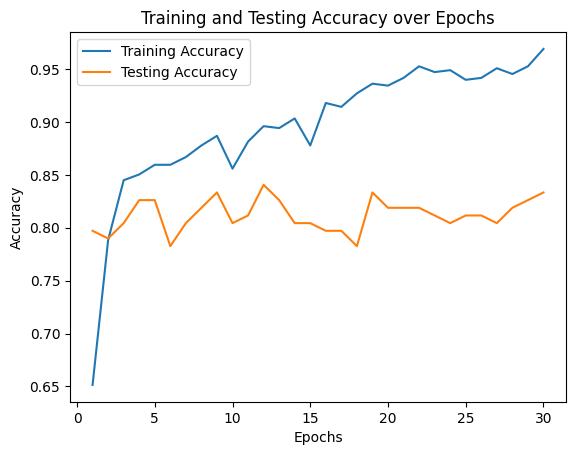

In [26]:
plt.plot(range(1, epochs + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, epochs + 1), test_accuracy, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy over Epochs')
plt.legend()
plt.show()

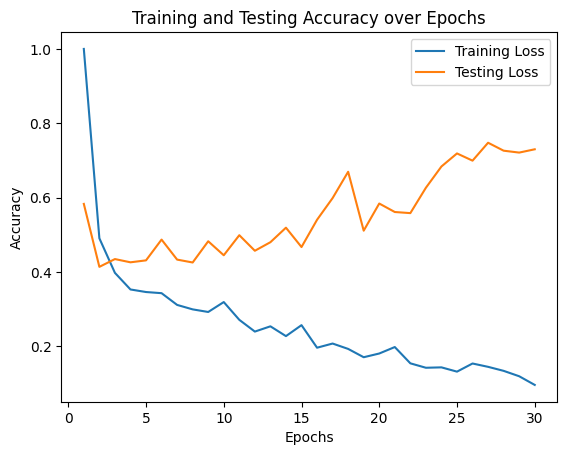

In [27]:
plt.plot(range(1, epochs + 1), train_loss, label='Training Loss')
plt.plot(range(1, epochs + 1), test_loss, label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy over Epochs')
plt.legend()
plt.show()

In [28]:
import pickle
model_filename = 'iste_recommender_final.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)